EXPERIMENT 1: IMPLEMENTATION OF BANANA CAMEL PROBLEM
AIM: A PERSON HAS 3000 BANANA AND A CAMEL. THE PERSON WANTS TO TRANSPORT THE MAXIMUM NUMBER OF BANANAS TO A DESTINATION WHICH IS 1000 KMS AWAT, USING ONLY THE CAMEL AS A MODE OF TRANSPORTATION, THE CAMEL CANNOT CARRY MORE THAN 1000 BANANA EVERY KM IT TRAVELS, WHAT IS THE MINIMUM NUMBER OF BANANAS THAT CAN BE TRASFERED TO THE DESTINATION USING ONLY CAMEL.

In [ ]:
total_banana = int(input("No. of bananas at the start: "))
distance = int(input("Distance to be covered: "))
load_capacity = int(input("Maximum banana camel can carry at a time: "))

banana_lost = 0
start = total_banana
for i in range(distance):
  while start>0:
    start = start-load_capacity
    if start == 1:
      banana_lost = banana_lost - 1
    banana_lost = banana_lost + 2
  banana_lost = banana_lost - 1
  start=total_banana - banana_lost
  if start==0:
    break
print("Total bananas delivered:",start)


No. of bananas at the start: 3000
Distance to be covered: 1000
Maximum banana camel can carry at a time: 1000
Total bananas delivered: 533


EXPERIMENT:2 GRAPH COLOURING

In [ ]:
def colour_vertices(graph):
  vertices = sorted((list(graph.keys())))
  colour_graph = {}
  for vertex in vertices:
    unused_colours = len(vertices) * [True]
    for neighbor in graph[vertex]:
      if neighbor in colour_graph:
        colour = colour_graph[neighbor]
        unused_colours[colour] = False
    for colour, unused in enumerate(unused_colours):
      if unused:
        colour_graph[vertex] = colour
        break
  return colour_graph
graph = { "a" : ["c", "d", "b"],
          "b" : ["c", "e", "a"],
          "c" : ["a", "b"],
          "d" : ["a","e"],
          "e" : ["d", "b"],
         }
result = (colour_vertices(graph))
print(result)

{'a': 0, 'b': 1, 'c': 2, 'd': 1, 'e': 0}


EXPERIMENT NO: 3 CONSTRAINT SATISFACTION SEARCH PROBLEM

In [ ]:
import itertools
import re

def solve(formula):
    """Given a formula like 'NUM + BER = PLAY', fill in digits to solve it.
    Generate all valid digit-filled-in strings."""
    return filter(valid, letter_replacements(formula))

def letter_replacements(formula):
    """All possible replacements of letters with digits in formula."""
    formula = formula.replace(' = ', ' == ') # Allow = or ==
    letters = cat(set(re.findall('[A-Z]', formula)))
    for digits in itertools.permutations('1234567890', len(letters)):
        yield formula.translate(str.maketrans(letters, cat(digits)))

def valid(exp):
    """Expression is valid iff it has no leading zero, and evaluates to true."""
    try:
        return not leading_zero(exp) and eval(exp) is True
    except ArithmeticError:
        return False

cat = ''.join # Function to concatenate strings

leading_zero = re.compile(r'\b0[0-9]').search # Function to check for illegal number
next(solve('SEND + MORE = MONEY'))

'9567 + 1085 == 10652'

EXPERIMENT NO: 4 BFS/DFS

In [ ]:
graph = {
  'A' : ['B','C'],
  'B' : ['D'],
  'C' : ['F'],
  'D' : ['E', 'F'],
  'E' : [],
  'F' : ['A']
}

visited = [] # Keep track of visited nodes.
queue = []   # Queue

def bfs(visited, graph, node):
    visited.append(node)
    queue.append(node)
    while queue:
        s = queue.pop(0)
        print (s, end = " ")
        for neighbour in graph[s]:
              if neighbour not in visited:
                    visited.append(neighbour)
                    queue.append(neighbour)

# Driver Code
bfs(visited, graph, 'A')

A B C D F E 

In [ ]:
graph = {
  'A' : ['B','C'],
  'B' : ['D'],
  'C' : ['F'],
  'D' : ['E', 'F'],
  'E' : [],
  'F' : ['A']
}
visited = set() # Keep track of visited nodes.

def dfs(visited, graph, node):
    if node not in visited:
        print (node)
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

dfs(visited, graph, 'A')

A
B
D
E
F
C


In [ ]:
graph = {
  'A' : ['B','C'],
  'B' : ['D', 'E'],
  'C' : ['F'],
  'D' : [],
  'E' : ['F'],
  'F' : []
}

visited_bfs = []
queue = []

def bfs(visited_bfs, graph, node):
  visited_bfs.append(node)
  queue.append(node)

  while queue:
    s = queue.pop(0)
    print (s, end = " ")

    for neighbour in graph[s]:
      if neighbour not in visited_bfs:
        visited_bfs.append(neighbour)
        queue.append(neighbour)

visited = set()

def dfs(visited, graph, node):
    if node not in visited:
        print (node, end=" ")
        visited.add(node)
        for neighbour in graph[node]:
            dfs(visited, graph, neighbour)

print("BFS:" , end =" ")
bfs(visited_bfs, graph, 'A')
print('\n')
print("DFS:" , end =" ")
dfs(visited, graph, 'A')

BFS: A B C D E F 

DFS: A B D E F C 

EXPERIMENT NO: 5 BEST FIRST SEARCH AND A*

In [ ]:
from queue import PriorityQueue
import matplotlib.pyplot as plt
import networkx as nx

# for implementing BFS | returns path having lowest cost
def best_first_search(source, target, n):
    visited = [0] * n
    visited[source] = True
    pq = PriorityQueue()
    pq.put((0, source))
    while pq.empty() == False:
        u = pq.get()[1]
        print(u, end=" ") # the path having lowest cost
        if u == target:
            break

        for v, c in graph[u]:
            if visited[v] == False:
                visited[v] = True
                pq.put((c, v))
    print()

# for adding edges to graph
def addedge(x, y, cost):
    graph[x].append((y, cost))
    graph[y].append((x, cost))

G = nx.Graph()
v = int(input("Enter the number of nodes: "))
graph = [[] for i in range(v)] # undirected Graph
e = int(input("Enter the number of edges: "))
print("Enter the edges along with their weights:")
for i in range(e):
    x, y, z = list(map(int, input().split()))
    addedge(x, y, z)
    G.add_edge(x, y, weight = z)

source = int(input("Enter the Source Node: "))
target = int(input("Enter the Target/Destination Node: "))
print("\nPath: ", end = "")
best_first_search(source, target, v)


Enter the number of nodes: 14
Enter the number of edges: 13
Enter the edges along with their weights:
0 1 3
0  2  6
0 3 5
1 4 9
1 5 8
2 6 12
2 7 14
3 8 7
8 9 5
8 10 6
9 11 1
9 12 10
9 13 2
Enter the Source Node: 0
Enter the Target/Destination Node: 9

Path: 0 1 3 2 8 9 


Graph:



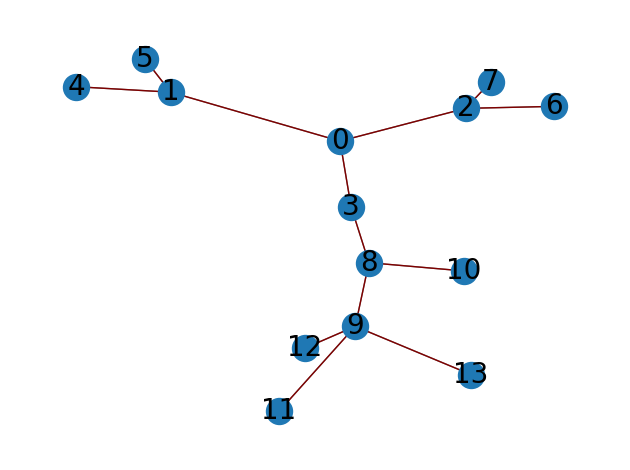

In [ ]:
print("Graph:\n")
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=350)

# edges
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color="r")

# labels
nx.draw_networkx_labels(G, pos, font_size=20)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
class Graph:

    # init class
    def __init__(self, graph_dict=None, directed=True):
        self.graph_dict = graph_dict or {}
        self.directed = directed
        if not directed:
            self.make_undirected()

    # create undirected graph by adding symmetric edges
    def make_undirected(self):
        for a in list(self.graph_dict.keys()):
            for (b, dist) in self.graph_dict[a].items():
                self.graph_dict.setdefault(b, {})[a] = dist

    # add link from A and B of given distance, and also add the inverse link if the graph is undirected
    def connect(self, A, B, distance=1):
        self.graph_dict.setdefault(A, {})[B] = distance
        if not self.directed:
            self.graph_dict.setdefault(B, {})[A] = distance

    # get neighbors or a neighbor
    def get(self, a, b=None):
        links = self.graph_dict.setdefault(a, {})
        if b is None:
            return links
        else:
            return links.get(b)

    # return list of nodes in the graph
    def nodes(self):
        s1 = set([k for k in self.graph_dict.keys()])
        s2 = set([k2 for v in self.graph_dict.values() for k2, v2 in v.items()])
        nodes = s1.union(s2)
        return list(nodes)

# node class
class Node:

    # init class
    def __init__(self, name:str, parent:str):
        self.name = name
        self.parent = parent
        self.g = 0 # distance to start node
        self.h = 0 # distance to goal node
        self.f = 0 # total cost

    # compare nodes
    def __eq__(self, other):
        return self.name == other.name

    # sort nodes
    def __lt__(self, other):
         return self.f < other.f

    # print node
    def __repr__(self):
        return ('({0},{1})'.format(self.name, self.f))

# A* search
def astar_search(graph, heuristics, start, end):

    # lists for open nodes and closed nodes
    open = []
    closed = []

    # a start node and an goal node
    start_node = Node(start, None)
    goal_node = Node(end, None)

    # add start node
    open.append(start_node)

    # loop until the open list is empty
    while len(open) > 0:


        open.sort()                                 # sort open list to get the node with the lowest cost first
        current_node = open.pop(0)                  # get node with the lowest cost
        closed.append(current_node)                 # add current node to the closed list

        # check if we have reached the goal, return the path
        if current_node == goal_node:
            path = []
            while current_node != start_node:
                path.append(current_node.name + ': ' + str(current_node.g))
                current_node = current_node.parent
            path.append(start_node.name + ': ' + str(start_node.g))
            return path[::-1]


        neighbors = graph.get(current_node.name)    # get neighbours

        # loop neighbors
        for key, value in neighbors.items():
            neighbor = Node(key, current_node)      # create neighbor node
            if(neighbor in closed):                 # check if the neighbor is in the closed list
                continue

            # calculate full path cost
            neighbor.g = current_node.g + graph.get(current_node.name, neighbor.name)
            neighbor.h = heuristics.get(neighbor.name)
            neighbor.f = neighbor.g + neighbor.h

            # check if neighbor is in open list and if it has a lower f value
            if(add_to_open(open, neighbor) == True):

                # everything is green, add neighbor to open list
                open.append(neighbor)

    # return None, no path is found
    return None

# check if a neighbor should be added to open list
def add_to_open(open, neighbor):
    for node in open:
        if (neighbor == node and neighbor.f > node.f):
            return False
    return True

# create a graph
graph = Graph() # user-based input for edges will be updated in the upcoming days
# create graph connections (Actual distance)
graph.connect('Frankfurt', 'Wurzburg', 111)
graph.connect('Frankfurt', 'Mannheim', 85)
graph.connect('Wurzburg', 'Nurnberg', 104)
graph.connect('Wurzburg', 'Stuttgart', 140)
graph.connect('Wurzburg', 'Ulm', 183)
graph.connect('Mannheim', 'Nurnberg', 230)
graph.connect('Mannheim', 'Karlsruhe', 67)
graph.connect('Karlsruhe', 'Basel', 191)
graph.connect('Karlsruhe', 'Stuttgart', 64)
graph.connect('Nurnberg', 'Ulm', 171)
graph.connect('Nurnberg', 'Munchen', 170)
graph.connect('Nurnberg', 'Passau', 220)
graph.connect('Stuttgart', 'Ulm', 107)
graph.connect('Basel', 'Bern', 91)
graph.connect('Basel', 'Zurich', 85)
graph.connect('Bern', 'Zurich', 120)
graph.connect('Zurich', 'Memmingen', 184)
graph.connect('Memmingen', 'Ulm', 55)
graph.connect('Memmingen', 'Munchen', 115)
graph.connect('Munchen', 'Ulm', 123)
graph.connect('Munchen', 'Passau', 189)
graph.connect('Munchen', 'Rosenheim', 59)
graph.connect('Rosenheim', 'Salzburg', 81)
graph.connect('Passau', 'Linz', 102)
graph.connect('Salzburg', 'Linz', 126)
# make graph undirected, create symmetric connections
graph.make_undirected()
# create heuristics (straight-line distance, air-travel distance)
heuristics = {}
heuristics['Basel'] = 204
heuristics['Bern'] = 247
heuristics['Frankfurt'] = 215
heuristics['Karlsruhe'] = 137
heuristics['Linz'] = 318
heuristics['Mannheim'] = 164
heuristics['Munchen'] = 120
heuristics['Memmingen'] = 47
heuristics['Nurnberg'] = 132
heuristics['Passau'] = 257
heuristics['Rosenheim'] = 168
heuristics['Stuttgart'] = 75
heuristics['Salzburg'] = 236
heuristics['Wurzburg'] = 153
heuristics['Zurich'] = 157
heuristics['Ulm'] = 0
# run the search algorithm
path = astar_search(graph, heuristics, 'Frankfurt', 'Ulm')
print("Path:", path)

Path: ['Frankfurt: 0', 'Wurzburg: 111', 'Ulm: 294']


EXPERMINT NO: 6 DST/FUZZY LOGIC


In [ ]:
A = dict()
B = dict()
Y = dict()
X = dict()
A = {"a":0.2, "b":0.3,"c":0.6,"d":0.6}
B = {"a":0.9, "b":0.9,"c":0.4,"d":0.5}
print("The first fuzzy set is:", A)
print("The second fuzzy set is:", B)
for A_key, B_key in zip(A,B):
  A_value=A[A_key]
  B_value=B[B_key]
  if A_value==B[B_key]:
    Y[B_key]=A_value
  else:
    Y[B_key]=B_value
  print("Fuzzy set union is:",Y)
  for A_key in A:
    X[A_key]=1-A[A_key]
  print("Fuzzy set compliment is:", X)

The first fuzzy set is: {'a': 0.2, 'b': 0.3, 'c': 0.6, 'd': 0.6}
The second fuzzy set is: {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy set union is: {'a': 0.9}
Fuzzy set compliment is: {'a': 0.8, 'b': 0.7, 'c': 0.4, 'd': 0.4}
Fuzzy set union is: {'a': 0.9, 'b': 0.9}
Fuzzy set compliment is: {'a': 0.8, 'b': 0.7, 'c': 0.4, 'd': 0.4}
Fuzzy set union is: {'a': 0.9, 'b': 0.9, 'c': 0.4}
Fuzzy set compliment is: {'a': 0.8, 'b': 0.7, 'c': 0.4, 'd': 0.4}
Fuzzy set union is: {'a': 0.9, 'b': 0.9, 'c': 0.4, 'd': 0.5}
Fuzzy set compliment is: {'a': 0.8, 'b': 0.7, 'c': 0.4, 'd': 0.4}


EXPERIMENT NO: 7 UNIFICATION AND RESOLUTION

In [ ]:
def get_index_comma(string):
    index_list = list()
    par_count = 0

    for i in range(len(string)):
        if string[i] == ',' and par_count == 0:
            index_list.append(i)
        elif string[i] == '(':
            par_count += 1
        elif string[i] == ')':
            par_count -= 1

    return index_list


def is_variable(expr):
    for i in expr:
        if i == '(' or i == ')':
            return False

    return True


def process_expression(expr):
    expr = expr.replace(' ', '')
    index = None
    for i in range(len(expr)):
        if expr[i] == '(':
            index = i
            break
    predicate_symbol = expr[:index]
    expr = expr.replace(predicate_symbol, '')
    expr = expr[1:len(expr) - 1]
    arg_list = list()
    indices = get_index_comma(expr)

    if len(indices) == 0:
        arg_list.append(expr)
    else:
        arg_list.append(expr[:indices[0]])
        for i, j in zip(indices, indices[1:]):
            arg_list.append(expr[i + 1:j])
        arg_list.append(expr[indices[len(indices) - 1] + 1:])

    return predicate_symbol, arg_list


def get_arg_list(expr):
    _, arg_list = process_expression(expr)

    flag = True
    while flag:
        flag = False

        for i in arg_list:
            if not is_variable(i):
                flag = True
                _, tmp = process_expression(i)
                for j in tmp:
                    if j not in arg_list:
                        arg_list.append(j)
                arg_list.remove(i)

    return arg_list


def check_occurs(var, expr):
    arg_list = get_arg_list(expr)
    if var in arg_list:
        return True

    return False


def unify(expr1, expr2):

    if is_variable(expr1) and is_variable(expr2):
        if expr1 == expr2:
            return 'Null'
        else:
            return False
    elif is_variable(expr1) and not is_variable(expr2):
        if check_occurs(expr1, expr2):
            return False
        else:
            tmp = str(expr2) + '/' + str(expr1)
            return tmp
    elif not is_variable(expr1) and is_variable(expr2):
        if check_occurs(expr2, expr1):
            return False
        else:
            tmp = str(expr1) + '/' + str(expr2)
            return tmp
    else:
        predicate_symbol_1, arg_list_1 = process_expression(expr1)
        predicate_symbol_2, arg_list_2 = process_expression(expr2)

        # Step 2
        if predicate_symbol_1 != predicate_symbol_2:
            return False
        # Step 3
        elif len(arg_list_1) != len(arg_list_2):
            return False
        else:
            # Step 4: Create substitution list
            sub_list = list()

            # Step 5:
            for i in range(len(arg_list_1)):
                tmp = unify(arg_list_1[i], arg_list_2[i])

                if not tmp:
                    return False
                elif tmp == 'Null':
                    pass
                else:
                    if type(tmp) == list:
                        for j in tmp:
                            sub_list.append(j)
                    else:
                        sub_list.append(tmp)

            # Step 6
            return sub_list


if __name__ == '__main__':

    f1 = 'Q(a, g(x, a), f(y))'
    f2 = 'Q(a, g(f(b), a), x)'
    # f1 = input('f1 : ')
    # f2 = input('f2 : ')

    result = unify(f1, f2)
    if not result:
        print('The process of Unification failed!')
    else:
        print('The process of Unification successful!')
        print(result)

The process of Unification successful!
['f(b)/x', 'f(y)/x']


In [ ]:
import copy
import time


class Parameter:
    variable_count = 1

    def __init__(self, name=None):
        if name:
            self.type = "Constant"
            self.name = name
        else:
            self.type = "Variable"
            self.name = "v" + str(Parameter.variable_count)
            Parameter.variable_count += 1

    def isConstant(self):
        return self.type == "Constant"

    def unify(self, type_, name):
        self.type = type_
        self.name = name

    def __eq__(self, other):
        return self.name == other.name

    def __str__(self):
        return self.name


class Predicate:
    def __init__(self, name, params):
        self.name = name
        self.params = params

    def __eq__(self, other):
        return self.name == other.name and all(a == b for a, b in zip(self.params, other.params))

    def __str__(self):
        return self.name + "(" + ",".join(str(x) for x in self.params) + ")"

    def getNegatedPredicate(self):
        return Predicate(negatePredicate(self.name), self.params)


class Sentence:
    sentence_count = 0

    def __init__(self, string):
        self.sentence_index = Sentence.sentence_count
        Sentence.sentence_count += 1
        self.predicates = []
        self.variable_map = {}
        local = {}

        for predicate in string.split("|"):
            name = predicate[:predicate.find("(")]
            params = []

            for param in predicate[predicate.find("(") + 1: predicate.find(")")].split(","):
                if param[0].islower():
                    if param not in local:  # Variable
                        local[param] = Parameter()
                        self.variable_map[local[param].name] = local[param]
                    new_param = local[param]
                else:
                    new_param = Parameter(param)
                    self.variable_map[param] = new_param

                params.append(new_param)

            self.predicates.append(Predicate(name, params))

    def getPredicates(self):
        return [predicate.name for predicate in self.predicates]

    def findPredicates(self, name):
        return [predicate for predicate in self.predicates if predicate.name == name]

    def removePredicate(self, predicate):
        self.predicates.remove(predicate)
        for key, val in self.variable_map.items():
            if not val:
                self.variable_map.pop(key)

    def containsVariable(self):
        return any(not param.isConstant() for param in self.variable_map.values())

    def __eq__(self, other):
        if len(self.predicates) == 1 and self.predicates[0] == other:
            return True
        return False

    def __str__(self):
        return "".join([str(predicate) for predicate in self.predicates])


class KB:
    def __init__(self, inputSentences):
        self.inputSentences = [x.replace(" ", "") for x in inputSentences]
        self.sentences = []
        self.sentence_map = {}

    def prepareKB(self):
        self.convertSentencesToCNF()
        for sentence_string in self.inputSentences:
            sentence = Sentence(sentence_string)
            for predicate in sentence.getPredicates():
                self.sentence_map[predicate] = self.sentence_map.get(
                    predicate, []) + [sentence]

    def convertSentencesToCNF(self):
        for sentenceIdx in range(len(self.inputSentences)):
            # Do negation of the Premise and add them as literal
            if "=>" in self.inputSentences[sentenceIdx]:
                self.inputSentences[sentenceIdx] = negateAntecedent(
                    self.inputSentences[sentenceIdx])

    def askQueries(self, queryList):
        results = []

        for query in queryList:
            negatedQuery = Sentence(negatePredicate(query.replace(" ", "")))
            negatedPredicate = negatedQuery.predicates[0]
            prev_sentence_map = copy.deepcopy(self.sentence_map)
            self.sentence_map[negatedPredicate.name] = self.sentence_map.get(
                negatedPredicate.name, []) + [negatedQuery]
            self.timeLimit = time.time() + 40

            try:
                result = self.resolve([negatedPredicate], [
                                      False]*(len(self.inputSentences) + 1))
            except:
                result = False

            self.sentence_map = prev_sentence_map

            if result:
                results.append("TRUE")
            else:
                results.append("FALSE")

        return results

    def resolve(self, queryStack, visited, depth=0):
        if time.time() > self.timeLimit:
            raise Exception
        if queryStack:
            query = queryStack.pop(-1)
            negatedQuery = query.getNegatedPredicate()
            queryPredicateName = negatedQuery.name
            if queryPredicateName not in self.sentence_map:
                return False
            else:
                queryPredicate = negatedQuery
                for kb_sentence in self.sentence_map[queryPredicateName]:
                    if not visited[kb_sentence.sentence_index]:
                        for kbPredicate in kb_sentence.findPredicates(queryPredicateName):

                            canUnify, substitution = performUnification(
                                copy.deepcopy(queryPredicate), copy.deepcopy(kbPredicate))

                            if canUnify:
                                newSentence = copy.deepcopy(kb_sentence)
                                newSentence.removePredicate(kbPredicate)
                                newQueryStack = copy.deepcopy(queryStack)

                                if substitution:
                                    for old, new in substitution.items():
                                        if old in newSentence.variable_map:
                                            parameter = newSentence.variable_map[old]
                                            newSentence.variable_map.pop(old)
                                            parameter.unify(
                                                "Variable" if new[0].islower() else "Constant", new)
                                            newSentence.variable_map[new] = parameter

                                    for predicate in newQueryStack:
                                        for index, param in enumerate(predicate.params):
                                            if param.name in substitution:
                                                new = substitution[param.name]
                                                predicate.params[index].unify(
                                                    "Variable" if new[0].islower() else "Constant", new)

                                for predicate in newSentence.predicates:
                                    newQueryStack.append(predicate)

                                new_visited = copy.deepcopy(visited)
                                if kb_sentence.containsVariable() and len(kb_sentence.predicates) > 1:
                                    new_visited[kb_sentence.sentence_index] = True

                                if self.resolve(newQueryStack, new_visited, depth + 1):
                                    return True
                return False
        return True


def performUnification(queryPredicate, kbPredicate):
    substitution = {}
    if queryPredicate == kbPredicate:
        return True, {}
    else:
        for query, kb in zip(queryPredicate.params, kbPredicate.params):
            if query == kb:
                continue
            if kb.isConstant():
                if not query.isConstant():
                    if query.name not in substitution:
                        substitution[query.name] = kb.name
                    elif substitution[query.name] != kb.name:
                        return False, {}
                    query.unify("Constant", kb.name)
                else:
                    return False, {}
            else:
                if not query.isConstant():
                    if kb.name not in substitution:
                        substitution[kb.name] = query.name
                    elif substitution[kb.name] != query.name:
                        return False, {}
                    kb.unify("Variable", query.name)
                else:
                    if kb.name not in substitution:
                        substitution[kb.name] = query.name
                    elif substitution[kb.name] != query.name:
                        return False, {}
    return True, substitution


def negatePredicate(predicate):
    return predicate[1:] if predicate[0] == "~" else "~" + predicate


def negateAntecedent(sentence):
    antecedent = sentence[:sentence.find("=>")]
    premise = []

    for predicate in antecedent.split("&"):
        premise.append(negatePredicate(predicate))

    premise.append(sentence[sentence.find("=>") + 2:])
    return "|".join(premise)


def getInput(filename):
    with open(filename, "r") as file:
        noOfQueries = int(file.readline().strip())
        inputQueries = [file.readline().strip() for _ in range(noOfQueries)]
        noOfSentences = int(file.readline().strip())
        inputSentences = [file.readline().strip()
                          for _ in range(noOfSentences)]
        return inputQueries, inputSentences


def printOutput(filename, results):
    print(results)
    with open(filename, "w") as file:
        for line in results:
            file.write(line)
            file.write("\n")
    file.close()


if __name__ == '__main__':
    inputQueries_, inputSentences_ = getInput('C:/shushrut/studies/SRM University/SEM 6/AI/7-Unification Resolutiion/Resolution/Input/input_1.txt')
    knowledgeBase = KB(inputSentences_)
    knowledgeBase.prepareKB()
    results_ = knowledgeBase.askQueries(inputQueries_)
    printOutput("output.txt", results_)

FileNotFoundError: ignored

EXPERIMENT NO:08 LR, SVM, NAIVE BAYES

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred_lr=lr.predict(X_test)
ln[45]
Y_pred_lr.shape
print("The logistic regression is:"+str(source_ln)+"%")

NameError: ignored

EXPERIMENT NO: 9 NLP

In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sample text for analysis
text = "I really enjoyed this movie. The acting was great and the plot was engaging."

# Calculate the sentiment score for the text
score = sia.polarity_scores(text)

# Print the sentiment score
print("negative = ", score["neg"])
print("neutral = ", score["neu"])
print("positive = ", score["pos"])
print("compound = ", score["compound"])


negative =  0.0
neutral =  0.498
positive =  0.502
compound =  0.8777


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
EXPERIMENT NO: 10 DEEP LEARNING

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Define the CNN architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same',
                        activation='relu', input_shape=x_train.shape[1:]),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

# Train the model on the training data
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4208 - accuracy: 0.4904 - val_loss: 1.1321 - val_accuracy: 0.6046
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.0459 - accuracy: 0.6352 - val_loss: 1.0292 - val_accuracy: 0.6410
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9160 - accuracy: 0.6801 - val_loss: 0.9487 - val_accuracy: 0.6715
Epoch 4/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8348 - accuracy: 0.7105 - val_loss: 0.9007 - val_accuracy: 0.6889
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7599 - accuracy: 0.7357 - val_loss: 0.9887 - val_accuracy: 0.6691
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7031 - accuracy: 0.7553 - val_loss: 0.8934 - val_accuracy: 0.6962
Epoch 7/10
1563/1563 [==============================] - 5